In [1]:
import pickle
import numpy as np
from tqdm import tqdm
from boltzmann_machine import BoltzmannMachine


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from utils import get_shifterProb_envStates, get_shiftprob_weight_mask
import plotly.express as px

def eval_shifter_net(bm, env_states, time = 100, gentle_sched = False):
    bm_test = BoltzmannMachine(env_states, 
                            bm.num_hnodes, 
                            init_W=bm.W,
                            # init_W=bm.learning_debug[250]['W'],
                            run_loop_count=1
                            )
    if gentle_sched:
        bm_test.sa_sched = [(4, 20), (4, 15), (4, 12), (8, 10), (8, 7), (8, 5)]
        # bm_test.equil_time_temp = (time, 5)
    else:
        bm_test.equil_time_temp = (time, 10)

    test_res = []
    for env_state in tqdm(env_states):
        ans = env_state[-3:]

        query = env_state.copy()
        query[-3:] = -1

        equi_samples = bm_test.search(query)
        
        uniqs, uniqs_counts = np.unique(equi_samples[:, -3-bm.num_hnodes-1:-bm.num_hnodes-1], return_counts=True, axis=0)
        pred = uniqs[np.argmax(uniqs_counts)]
        is_correct = (pred==ans).all()
        # print(uniqs, uniqs_counts, is_correct)
        test_res.append(is_correct)

    print(f'Result: {sum(test_res)}')
    return test_res


In [2]:
vis_grp_size = 8

shifterProb_metadata = {
    'batch_size': 1000,
    'vis_grp_size': vis_grp_size,
    'on_bit_prob': 0.3,
    'weight_decay': 0.0005
    # 'weight_decay': 0
}

num_hnodes = 24
base_dir = './shifter_saved_runs/'

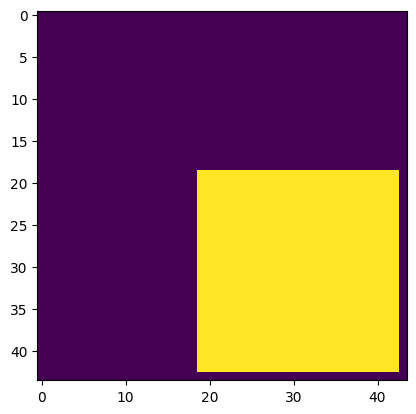

In [3]:
env_states = get_shifterProb_envStates(shifterProb_metadata['vis_grp_size'])
weight_mask = get_shiftprob_weight_mask(shifterProb_metadata['vis_grp_size'], num_hnodes)

plt.imshow(weight_mask)

In [ ]:
# W_loaded = np.load(f'{base_dir}/shifter_W_1.npy')
# W_loaded.shape

(44, 44)

In [4]:
clamped_loop_count = 2

bm = BoltzmannMachine(env_states, 
                      num_hnodes, 
                      weight_mask=weight_mask,
                      noisy_clamping=False,
                      shifterProb_metadata=shifterProb_metadata,

                    #   init_W=W_loaded, ###########
                      # init_W=bm.W, ###########
                     
                      log_freq=10,
                      detailed_log=False,
                      save_debug_data=False,
                     
                      run_loop_count=1,
                      clamped_loop_count=clamped_loop_count
                     )
bm.learn(10)

for i in range(100):

    print(f'#{i+1}', end=' ')
    eval_shifter_net(bm, env_states)
    
    
    bm = BoltzmannMachine(env_states, 
                      num_hnodes, 
                      weight_mask=weight_mask,
                      init_W=bm.W,
                      noisy_clamping=False,
                      shifterProb_metadata=shifterProb_metadata,
                     
                      log_freq=10,
                      detailed_log=False,
                      save_debug_data=False,
                     
                      run_loop_count=1,
                      clamped_loop_count=clamped_loop_count
                     )
    bm.learn(10)

  0%|          | 0/10 [00:00<?, ?it/s]

1000 ------ 2 W_range: (0.0, 0.0)
#1 

100%|██████████| 768/768 [01:13<00:00, 10.39it/s]

Result: 219


  0%|          | 0/10 [00:00<?, ?it/s]

948 ------ 2 W_range: (-16.0, 4.0)
#2 

100%|██████████| 768/768 [01:11<00:00, 10.69it/s]

Result: 260


  0%|          | 0/10 [00:00<?, ?it/s]

471 ------ 11 W_range: (-32.0, 8.0)
#3 

100%|██████████| 768/768 [01:15<00:00, 10.19it/s]

Result: 255


  0%|          | 0/10 [00:00<?, ?it/s]

431 ------ 2 W_range: (-44.0, 12.0)
#4 

100%|██████████| 768/768 [01:13<00:00, 10.46it/s]

Result: 257


  0%|          | 0/10 [00:00<?, ?it/s]

506 ------ 4 W_range: (-48.0, 16.0)
#5 

100%|██████████| 768/768 [01:13<00:00, 10.44it/s]

Result: 279


  0%|          | 0/10 [00:00<?, ?it/s]

600 ------ 1 W_range: (-52.0, 16.0)
#6 

100%|██████████| 768/768 [01:14<00:00, 10.28it/s]

Result: 293


  0%|          | 0/10 [00:00<?, ?it/s]

796 ------ 13 W_range: (-60.0, 16.0)
#7 

100%|██████████| 768/768 [01:15<00:00, 10.24it/s]

Result: 297


  0%|          | 0/10 [00:00<?, ?it/s]

892 ------ 8 W_range: (-64.0, 20.0)
#8 

100%|██████████| 768/768 [01:14<00:00, 10.26it/s]

Result: 248


  0%|          | 0/10 [00:00<?, ?it/s]

919 ------ 0 W_range: (-64.0, 24.0)
#9 

100%|██████████| 768/768 [01:14<00:00, 10.37it/s]

Result: 221


  0%|          | 0/10 [00:00<?, ?it/s]

969 ------ 1 W_range: (-72.0, 28.0)
#10 

100%|██████████| 768/768 [01:14<00:00, 10.26it/s]

Result: 177


  0%|          | 0/10 [00:00<?, ?it/s]

962 ------ 2 W_range: (-72.0, 28.0)
#11 

100%|██████████| 768/768 [01:13<00:00, 10.45it/s]

Result: 299


  0%|          | 0/10 [00:00<?, ?it/s]

982 ------ 3 W_range: (-76.0, 28.0)
#12 

100%|██████████| 768/768 [01:25<00:00,  8.97it/s]

Result: 321


  0%|          | 0/10 [00:00<?, ?it/s]

993 ------ 7 W_range: (-76.0, 24.0)
#13 

100%|██████████| 768/768 [01:15<00:00, 10.19it/s]

Result: 300


  0%|          | 0/10 [00:00<?, ?it/s]

975 ------ 5 W_range: (-76.0, 24.0)
#14 

100%|██████████| 768/768 [01:14<00:00, 10.26it/s]

Result: 312


  0%|          | 0/10 [00:00<?, ?it/s]

985 ------ 5 W_range: (-68.0, 24.0)
#15 

100%|██████████| 768/768 [01:13<00:00, 10.38it/s]

Result: 299


  0%|          | 0/10 [00:00<?, ?it/s]

956 ------ 1 W_range: (-68.0, 28.0)
#16 

100%|██████████| 768/768 [01:15<00:00, 10.23it/s]

Result: 342


  0%|          | 0/10 [00:00<?, ?it/s]

954 ------ 11 W_range: (-76.0, 28.0)
#17 

100%|██████████| 768/768 [01:22<00:00,  9.34it/s]

Result: 274


  0%|          | 0/10 [00:00<?, ?it/s]

956 ------ 10 W_range: (-72.0, 32.0)
#18 

100%|██████████| 768/768 [01:13<00:00, 10.41it/s]

Result: 338


  0%|          | 0/10 [00:00<?, ?it/s]

956 ------ 1 W_range: (-76.0, 28.0)
#19 

100%|██████████| 768/768 [01:21<00:00,  9.48it/s]

Result: 338


  0%|          | 0/10 [00:00<?, ?it/s]

969 ------ 2 W_range: (-76.0, 32.0)
#20 

100%|██████████| 768/768 [01:13<00:00, 10.43it/s]

Result: 361


  0%|          | 0/10 [00:00<?, ?it/s]

953 ------ 5 W_range: (-72.0, 28.0)
#21 

100%|██████████| 768/768 [01:20<00:00,  9.56it/s]

Result: 337


  0%|          | 0/10 [00:00<?, ?it/s]

926 ------ 5 W_range: (-80.0, 28.0)
#22 

100%|██████████| 768/768 [01:09<00:00, 10.97it/s]

Result: 382


  0%|          | 0/10 [00:00<?, ?it/s]

929 ------ 12 W_range: (-80.0, 24.0)
#23 

100%|██████████| 768/768 [01:10<00:00, 10.88it/s]

Result: 337


  0%|          | 0/10 [00:00<?, ?it/s]

945 ------ 4 W_range: (-72.0, 28.0)
#24 

100%|██████████| 768/768 [01:09<00:00, 11.13it/s]


Result: 354


  0%|          | 0/10 [00:00<?, ?it/s]

870 ------ 8 W_range: (-72.0, 32.0)
#25 

100%|██████████| 768/768 [01:15<00:00, 10.15it/s]

Result: 334


  0%|          | 0/10 [00:00<?, ?it/s]

870 ------ 9 W_range: (-72.0, 28.0)
#26 

100%|██████████| 768/768 [01:13<00:00, 10.43it/s]

Result: 352


  0%|          | 0/10 [00:00<?, ?it/s]

878 ------ 9 W_range: (-68.0, 28.0)
#27 

100%|██████████| 768/768 [01:11<00:00, 10.68it/s]

Result: 325


  0%|          | 0/10 [00:00<?, ?it/s]

880 ------ 10 W_range: (-68.0, 28.0)
#28 

100%|██████████| 768/768 [01:17<00:00,  9.86it/s]

Result: 290


  0%|          | 0/10 [00:00<?, ?it/s]

873 ------ 10 W_range: (-68.0, 28.0)
#29 

100%|██████████| 768/768 [01:07<00:00, 11.45it/s]

Result: 360


  0%|          | 0/10 [00:00<?, ?it/s]

847 ------ 8 W_range: (-68.0, 28.0)
#30 

100%|██████████| 768/768 [01:07<00:00, 11.46it/s]

Result: 382


  0%|          | 0/10 [00:00<?, ?it/s]

852 ------ 11 W_range: (-68.0, 28.0)
#31 

100%|██████████| 768/768 [01:06<00:00, 11.61it/s]


Result: 377


  0%|          | 0/10 [00:00<?, ?it/s]

826 ------ 10 W_range: (-64.0, 28.0)
#32 

100%|██████████| 768/768 [01:06<00:00, 11.49it/s]

Result: 274


  0%|          | 0/10 [00:00<?, ?it/s]

838 ------ 9 W_range: (-64.0, 28.0)
#33 

100%|██████████| 768/768 [01:07<00:00, 11.34it/s]

Result: 272


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
bm.W

array([[  0.,  -6.,  -8., ...,   2.,  -4., -10.],
       [ -6.,   0.,  -4., ...,  -2.,   2., -94.],
       [ -8.,  -4.,   0., ...,   4., -10., -18.],
       ...,
       [  2.,  -2.,   4., ...,   0.,   0., -22.],
       [ -4.,   2., -10., ...,   0.,   0., -18.],
       [-10., -94., -18., ..., -22., -18.,   0.]])

In [6]:
np.unique(W_loaded==bm.W, return_counts=True)

(array([False,  True]), array([ 702, 1234], dtype=int64))

In [ ]:
# with PdfPages(f'{base_dir}/dominance_plot.pdf') as pdf:
#     for i in range(len(bm.learning_debug)):
#         arr_ =  np.sign(np.abs(bm.learning_debug[i]['diff']) - np.abs(bm.learning_debug[i]['WD']))
#         plt.imshow(arr_)
#         plt.colorbar()
#         pdf.savefig()  # Save the current figure into the PDF
#         plt.close()

In [5]:
# np.save(f'{base_dir}/shifter_W_BS500_CC4_1', bm.W)
np.save(f'{base_dir}/shifter_W_1', bm.W)


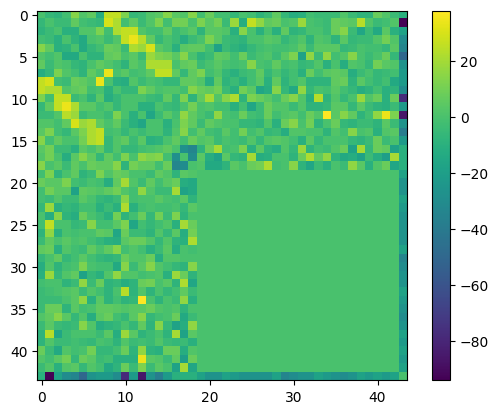

In [8]:
plt.imshow(bm.W)
# plt.imshow(W_loaded)
plt.colorbar()


In [9]:
# px.imshow(W_loaded)
px.imshow(bm.W)

### Evaluation

In [19]:
# bm_ = BoltzmannMachine(env_states, num_hnodes, init_W=bm.W)
test_res = eval_shifter_net(bm, env_states, gentle_sched=True)

100%|██████████| 768/768 [00:30<00:00, 25.07it/s]

Result: 255


In [12]:
one_counts = (env_states[:, :shifterProb_metadata['vis_grp_size']]==1).sum(axis=1)
test_res = np.array(test_res)

for count in range(0, 9):
    idxs_ = np.nonzero(one_counts==count)[0]
    print(count, test_res[idxs_].sum()/len(idxs_))
    

0 0.0
1 0.375
2 0.40476190476190477
3 0.4523809523809524
4 0.3523809523809524
5 0.27380952380952384
6 0.15476190476190477
7 0.08333333333333333
8 0.0


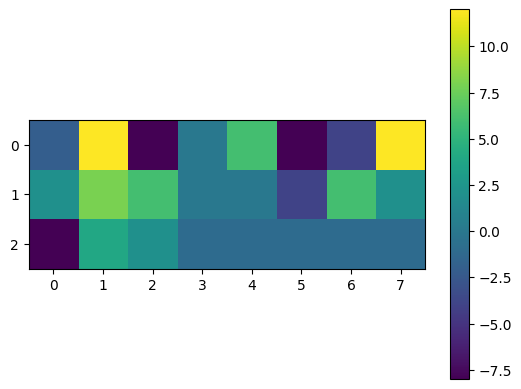

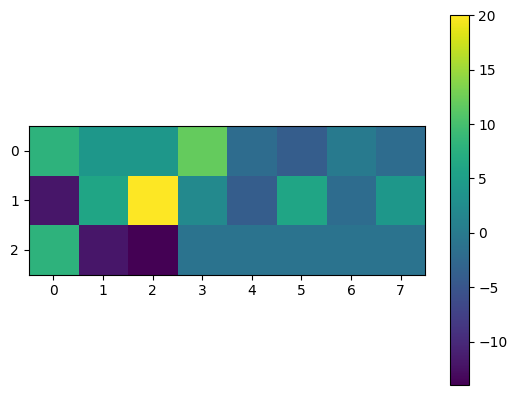

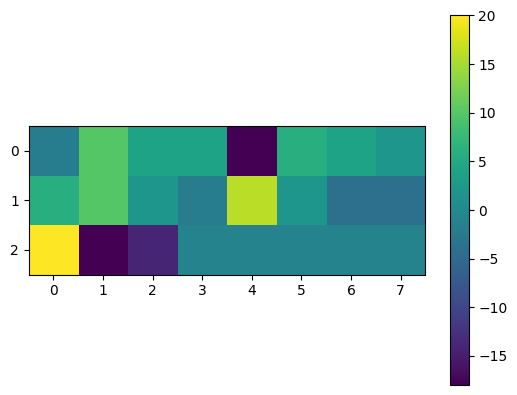

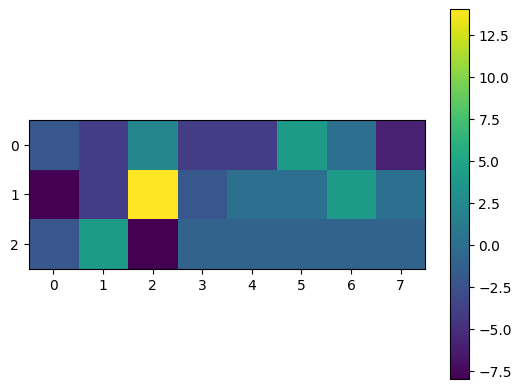

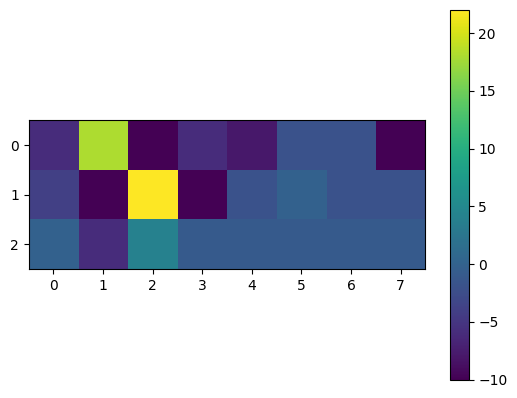

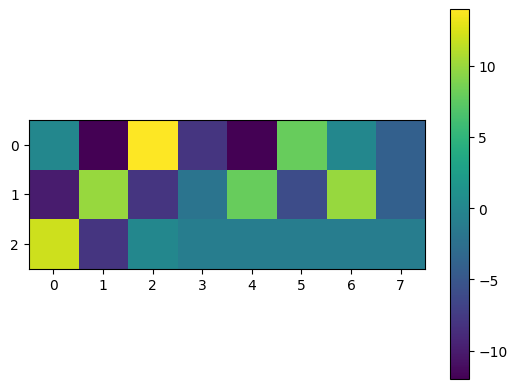

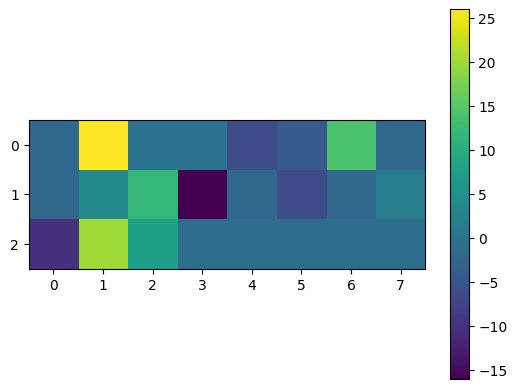

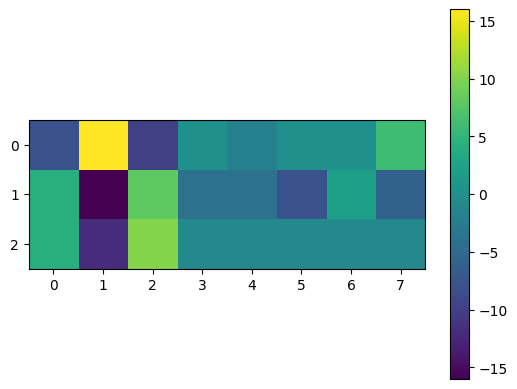

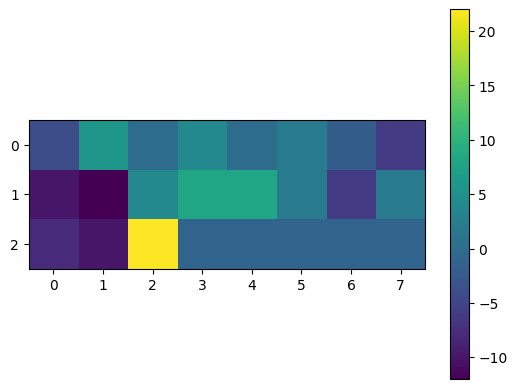

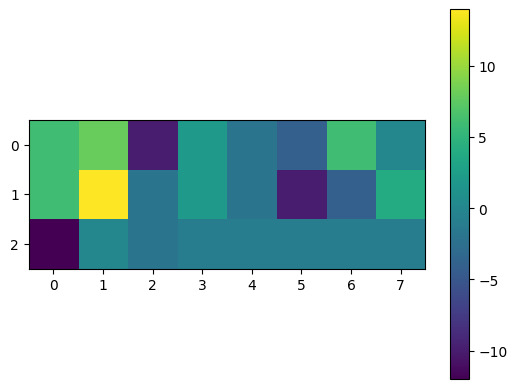

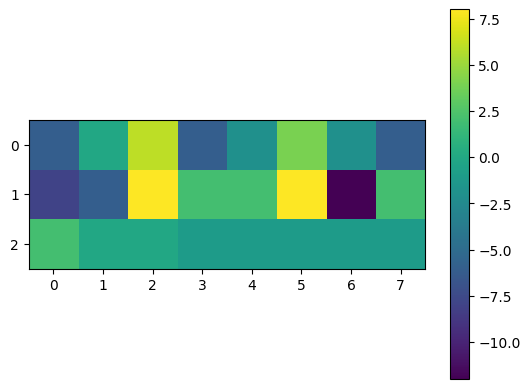

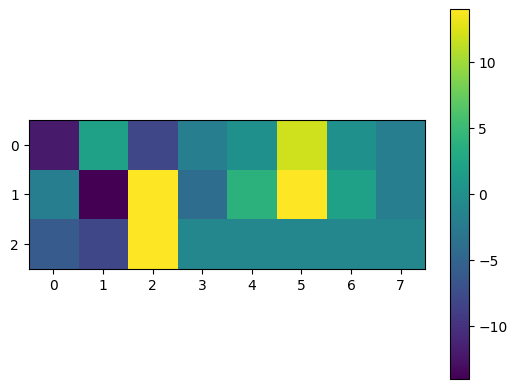

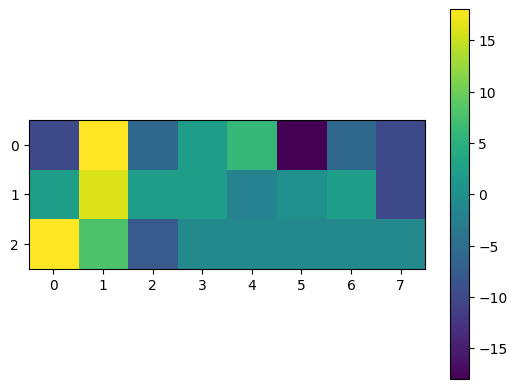

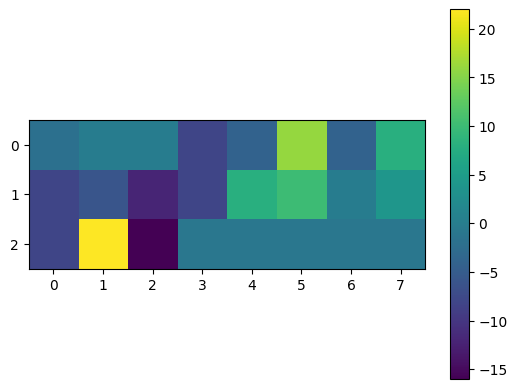

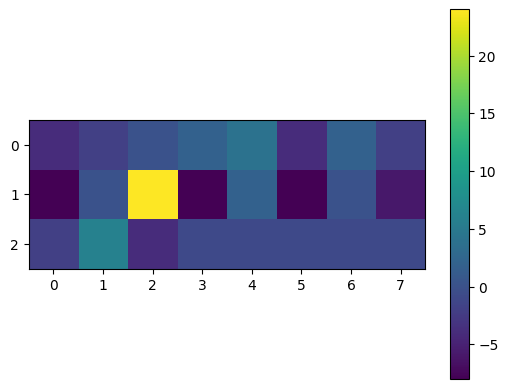

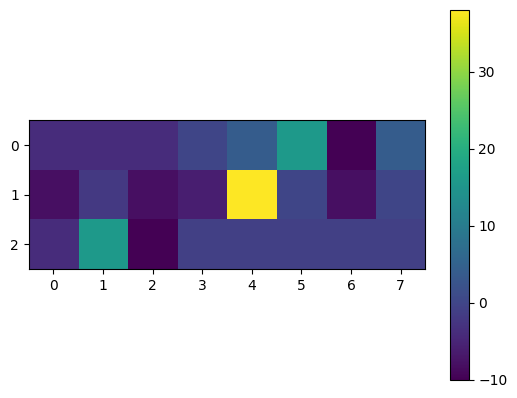

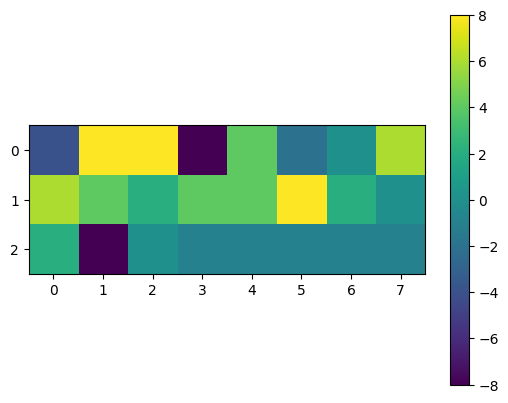

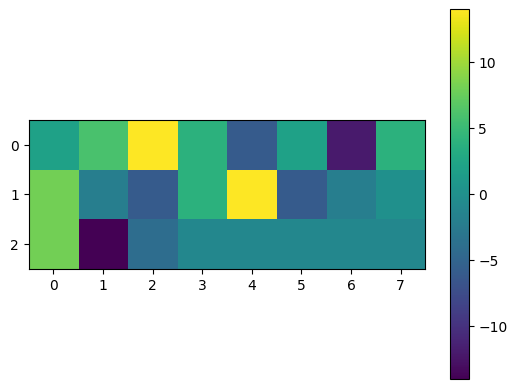

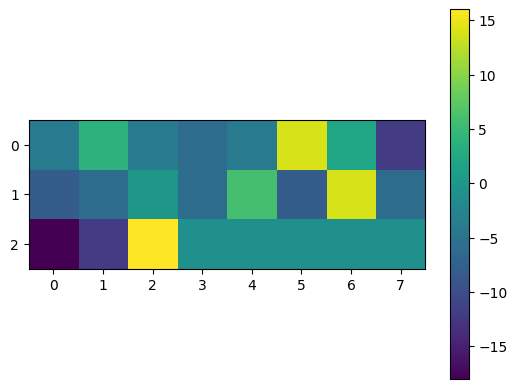

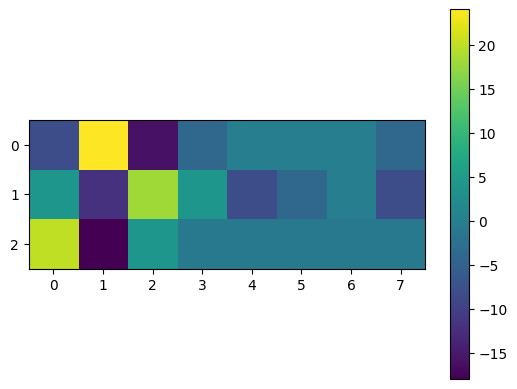

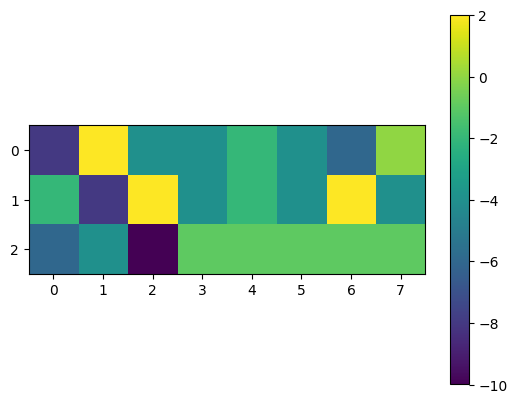

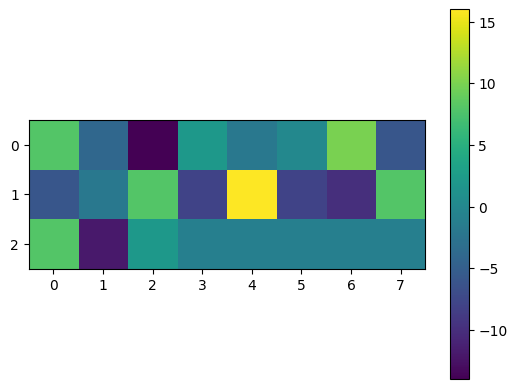

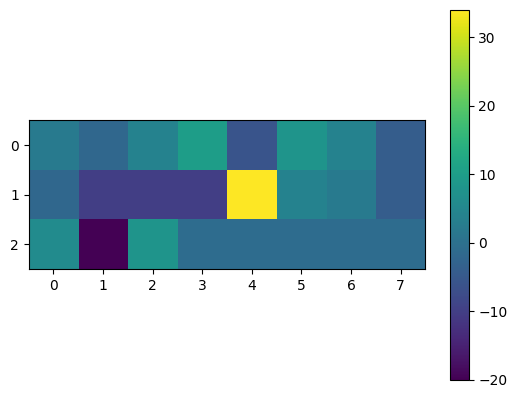

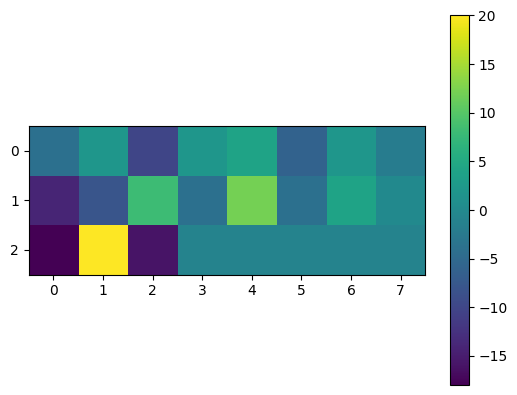

In [13]:
for ih in range(bm.num_vnodes, bm.num_vnodes+num_hnodes):
    htov_weights = bm.W[ih, :bm.num_vnodes]
    
    htoFirstGrp = htov_weights[:vis_grp_size]
    htoSecondGrp = htov_weights[vis_grp_size:2*vis_grp_size]
    htoLabel = np.append(htov_weights[2*vis_grp_size:], 5*[-1])
    htov_reshaped = np.array([htoFirstGrp, htoSecondGrp, htoLabel])

    plt.imshow(htov_reshaped)
    plt.colorbar()
    plt.show()
    # print(htov_reshaped)
    # print('-----------------------------------------------------')